In [33]:
import numpy as np
import pandas as pd

In [34]:
dataset = pd.read_csv(r'D:/book/decision_tree/homework/week1/ID3_homework.txt', sep = '\s+', header=None)

In [35]:
dataset = dataset.iloc[:, 1:]

In [36]:
dataset.columns = ['outlook', 'temperature', 'humidity', 'wind', 'label']
dataset

,outlook,temperature,humidity,wind,label
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [37]:
dataset['label'].value_counts()

Yes    9
No     5
Name: label, dtype: int64

In [38]:
entropy_dataset = - (5 / 14) * np.log2(5 / 14) - 9 / 14 * np.log2(9 / 14)
entropy_dataset

0.9402859586706311

# 第一次分叉

## 计算每个特征的熵

In [39]:
num_dataset = len(dataset)

In [40]:
#计算outlook的熵，并求出信息增益
dataset['outlook'].value_counts()

Sunny       5
Rain        5
Overcast    4
Name: outlook, dtype: int64

In [41]:
dataset.groupby(['outlook'])['label'].value_counts()

outlook   label
Overcast  Yes      4
Rain      Yes      3
          No       2
Sunny     No       3
          Yes      2
Name: label, dtype: int64

In [42]:
entropy_outlook = (5 / num_dataset) * ( -2 / 5 * np.log2(2 / 5) - 3 / 5 * np.log2(3 / 5)) + \
(5 / num_dataset) * ( -2 / 5 * np.log2(2 / 5) - 3 / 5 * np.log2(3 / 5)) #Rain
entropy_dataset - entropy_outlook

0.24674981977443933

In [43]:
#计算temperature的熵，并求出信息增益
print(dataset['temperature'].value_counts())
print(dataset.groupby(['temperature'])['label'].value_counts())

Mild    6
Hot     4
Cool    4
Name: temperature, dtype: int64
temperature  label
Cool         Yes      3
             No       1
Hot          No       2
             Yes      2
Mild         Yes      4
             No       2
Name: label, dtype: int64


In [44]:
entropy_temperature = (6 / num_dataset) * ( -2 / 6 * np.log2(2 / 6) - 4 / 6 * np.log2(4 / 6)) + \
(4 / num_dataset) * ( -2 / 4 * np.log2(2 / 4) - 2 / 4 * np.log2(2 / 4)) + \
(4 / num_dataset) * ( -1 / 4 * np.log2(1 / 4) - 3 / 4 * np.log2(3 / 4))
entropy_dataset - entropy_temperature

0.02922256565895487

In [45]:
#计算humidity的熵，并求出信息增益
print(dataset['humidity'].value_counts())
print(dataset.groupby(['humidity'])['label'].value_counts())

High      7
Normal    7
Name: humidity, dtype: int64
humidity  label
High      No       4
          Yes      3
Normal    Yes      6
          No       1
Name: label, dtype: int64


In [46]:
entropy_humidity = (7 / num_dataset) * ( -4 / 7 * np.log2(4 / 7) - 3 / 7 * np.log2(3 / 7)) + \
(7 / num_dataset) * ( -6 / 7 * np.log2(6 / 7) - 1 / 7 * np.log2(1 / 7))
entropy_dataset - entropy_humidity

0.15183550136234159

In [47]:
#计算wind的熵，并求出信息增益
print(dataset['wind'].value_counts())
print(dataset.groupby(['wind'])['label'].value_counts())

Weak      8
Strong    6
Name: wind, dtype: int64
wind    label
Strong  No       3
        Yes      3
Weak    Yes      6
        No       2
Name: label, dtype: int64


In [48]:
entropy_wind = (8 / num_dataset) * ( -2 / 8 * np.log2(2 / 8) - 6 / 8 * np.log2(6 / 8)) + \
(6 / num_dataset) * ( -3 / 6 * np.log2(3 / 6) - 3 / 6 * np.log2(3 / 6))
entropy_dataset - entropy_wind

0.04812703040826949

In [54]:
#根据比较，outlook的信息增益是最大的
print('Sunny is\n', dataset.loc[dataset['outlook'] == 'Sunny'])
print('Overcast is\n', dataset.loc[dataset['outlook'] == 'Overcast'])
print('Rain is\n', dataset.loc[dataset['outlook'] == 'Rain'])

#根据Overcast的结果，所有的样本都划分成了一类，达到递归结束条件返回

Sunny is
    outlook temperature humidity    wind label
0    Sunny         Hot     High    Weak    No
1    Sunny         Hot     High  Strong    No
7    Sunny        Mild     High    Weak    No
8    Sunny        Cool   Normal    Weak   Yes
10   Sunny        Mild   Normal  Strong   Yes
Overcast is
      outlook temperature humidity    wind label
2   Overcast         Hot     High    Weak   Yes
6   Overcast        Cool   Normal  Strong   Yes
11  Overcast        Mild     High  Strong   Yes
12  Overcast         Hot   Normal    Weak   Yes
Rain is
    outlook temperature humidity    wind label
3     Rain        Mild     High    Weak   Yes
4     Rain        Cool   Normal    Weak   Yes
5     Rain        Cool   Normal  Strong    No
9     Rain        Mild   Normal    Weak   Yes
13    Rain        Mild     High  Strong    No


# 第二次分叉，是第一次分叉的子分支

In [69]:
#先对Sunny数据进行进一步划分
sunny_dataset = dataset.loc[dataset['outlook'] == 'Sunny']
entropy_sunny = -(2 / 5) * np.log2(2 / 5) - (3 / 5) * np.log2(3 / 5)
entropy_sunny

0.9709505944546686

In [77]:
#计算temperature的熵(Sunny)，并求出信息增益
print(sunny_dataset['temperature'].value_counts())
print(sunny_dataset.groupby(['temperature'])['label'].value_counts())

Hot     2
Mild    2
Cool    1
Name: temperature, dtype: int64
temperature  label
Cool         Yes      1
Hot          No       2
Mild         No       1
             Yes      1
Name: label, dtype: int64


In [78]:
sunny_entropy_temperature = (2 / 5) * (-1 / 2 * np.log2(1 / 2) - 1 / 2 * np.log2(1 / 2))
entropy_sunny - sunny_entropy_temperature

0.5709505944546686

## 第三次分叉，是Sunny分叉的子分支

In [79]:
#计算humidity的熵(Sunny)，并求出信息增益
print(sunny_dataset['humidity'].value_counts())
print(sunny_dataset.groupby(['humidity'])['label'].value_counts())

High      3
Normal    2
Name: humidity, dtype: int64
humidity  label
High      No       3
Normal    Yes      2
Name: label, dtype: int64


In [80]:
#由上图可见，直接都划分出来了，所以可直接选择该特征了，为了严谨性，我们继续看下其他特征
print(sunny_dataset['wind'].value_counts())
print(sunny_dataset.groupby(['wind'])['label'].value_counts())

sunny_entropy_wind = (2 / 5) * (-1 / 2 * np.log2(1 / 2) - 1 / 2 * np.log2(1 / 2)) + \
(3 / 5) * (-1 / 3 * np.log2(1 / 3) - 2 / 3 * np.log2(2 / 3))
entropy_sunny - sunny_entropy_wind

Weak      3
Strong    2
Name: wind, dtype: int64
wind    label
Strong  No       1
        Yes      1
Weak    No       2
        Yes      1
Name: label, dtype: int64


0.01997309402197489

## 第四次分叉，是Overcast分叉的子分支
- 由于Overcast已经划分出来了，所以不需要进一步的划分

In [85]:
dataset.loc[dataset['outlook'] == 'Overcast']

,outlook,temperature,humidity,wind,label
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


## 第五次分叉，是Rain分叉的子分支

In [81]:
#最后对Rain数据进行进一步划分
rain_dataset = dataset.loc[dataset['outlook'] == 'Rain']
entropy_rain = -(2 / 5) * np.log2(2 / 5) - (3 / 5) * np.log2(3 / 5)
entropy_rain

0.9709505944546686

In [82]:
#计算tempearture的熵(Sunny)
print(rain_dataset['temperature'].value_counts())
print(rain_dataset.groupby(['temperature'])['label'].value_counts())

Mild    3
Cool    2
Name: temperature, dtype: int64
temperature  label
Cool         No       1
             Yes      1
Mild         Yes      2
             No       1
Name: label, dtype: int64


In [83]:
#计算humidity的熵(Sunny)
print(rain_dataset['humidity'].value_counts())
print(rain_dataset.groupby(['humidity'])['label'].value_counts())


Normal    3
High      2
Name: humidity, dtype: int64
humidity  label
High      No       1
          Yes      1
Normal    Yes      2
          No       1
Name: label, dtype: int64


In [84]:
#计算wind的熵(Sunny)，并求出信息增益
print(rain_dataset['wind'].value_counts())
print(rain_dataset.groupby(['wind'])['label'].value_counts())

#可知根据wind直接划分出来了

Weak      3
Strong    2
Name: wind, dtype: int64
wind    label
Strong  No       2
Weak    Yes      3
Name: label, dtype: int64


# 最终的决策树
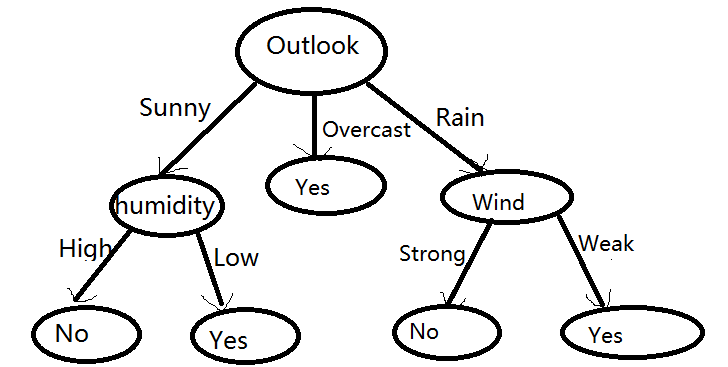

# 踩过的坑

- pd.read_csv()中，忘记添加了header = None，少了一条数据，结果导致计算熵的差的时候莫名其妙出现了负值。
- np.log2后面打成了np.log
- 刚开始命名不是很明确，看的时候不是很顺畅